In [21]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
%matplotlib inline
data=pd.read_csv('C:/Users/SRIKANT NAYAK/Documents/code/bloom_texonomy/data2.csv',encoding= 'unicode_escape')
upsc_data=pd.read_csv('C:/Users/SRIKANT NAYAK/Documents/code/bloom_texonomy/upsc.csv',encoding= 'unicode_escape')
df=pd.DataFrame(data)
upsc_df=pd.DataFrame(upsc_data)


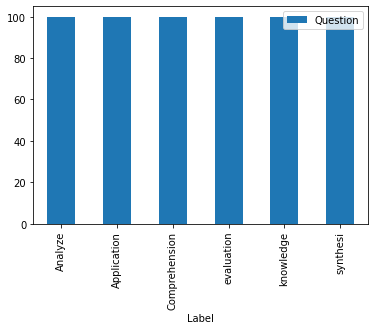

In [22]:
df.groupby('Label').count().plot.bar(ylim=0)
plt.show()

# Preprocessing the text data

In [23]:
stemmer = PorterStemmer()
words = stopwords.words("english")
df['cleaned'] = df['Question'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
df
upsc_df['cleaned'] = upsc_df['Question'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
upsc_df


,Question,cleaned
0,The 1857 Uprising was the culmination of the r...,the upris culmin recurr big small local rebell...
1,Examine the linkages between the ninteenth cen...,examin linkag ninteenth centuri indian renaiss...
2,Assess the impact of global warming on the cor...,assess impact global warm coral life system ex...
3,Discuss the causes of depletion of mangroves a...,discuss caus deplet mangrov explain import mai...
4,Can the strategy of regional resource-based ma...,can strategi region resourc base manufactur he...
5,Discuss the factors for localisation of agro-b...,discuss factor localis agro base food process ...
6,What makes the Indian society unique in sustai...,what make indian societi uniqu sustain cultur ...
7,"""Empowering women is the key to control popula...",empow women key control popul growth discuss
8,What are the challenges to our cultural practi...,what challeng cultur practic name secular
9,Many voices had strengthened and enriched the ...,mani voic strengthen enrich nationalist moveme...


# Apply TD-IDF

In [24]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['cleaned']).toarray()
upsc_features = vectorizer.fit_transform(upsc_df['cleaned']).toarray()
final_features.shape
#upsc_features.shape

(600, 325)

# Apply Random Forest

In [26]:
X = df['cleaned']
Y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
# instead of doing these steps one at a time, we can use a pipeline to complete them all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=100)),
                     ('clf', RandomForestClassifier())])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)
ytest = np.array(y_test)
print(accuracy_score(y_test,model.predict(X_test)))
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))


0.7333333333333333
               precision    recall  f1-score   support

      Analyze       0.90      0.90      0.90        31
  Application       0.60      0.67      0.63        18
Comprehension       0.90      0.72      0.80        25
   evaluation       0.85      0.48      0.61        23
    knowledge       0.57      0.90      0.69        29
     synthesi       0.75      0.62      0.68        24

     accuracy                           0.73       150
    macro avg       0.76      0.71      0.72       150
 weighted avg       0.77      0.73      0.73       150

[[28  0  0  0  3  0]
 [ 0 12  0  0  4  2]
 [ 1  0 18  0  5  1]
 [ 1  4  0 11  5  2]
 [ 0  1  2  0 26  0]
 [ 1  3  0  2  3 15]]
